# IMPORTS

In [1]:
# BASIC IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import joblib
from sklearn.pipeline import Pipeline


# MODELLING
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier,
                                AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# MODEL SELECETION
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import ( r2_score, mean_absolute_error, mean_squared_error,
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, precision_score, recall_score, f1_score, log_loss,
    matthews_corrcoef, cohen_kappa_score, accuracy_score, roc_curve, auc, 
)


`SUPRESSING SOME WARNING`

In [2]:
warnings.filterwarnings("ignore", message="Precision is ill-defined and being set to 0.0 in labels with no predicted samples.")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", message="Could not find the number of physical cores*", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*loky.backend.context.*")


`DATASET: OBESITY ESTIMATION CLEANED`    

In [3]:
df = pd.read_csv('C:/Users/kabee/OneDrive/Desktop/DS_PROJECT/notebook/data/Obesity Estimation Cleaned.csv')

# INFO

In [4]:
df.head()

,Gender,Age,Height,Weight,FamOverweightHist,FreqHighCalFood,FreqVeg,MainMeals,FoodBtwMeals,Smoke,WaterIntake,CalorieMonitor,FreqPhyAct,TechUse,AlcoholConsump,Transport,Obesity,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.34


In [5]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FamOverweightHist',
       'FreqHighCalFood', 'FreqVeg', 'MainMeals', 'FoodBtwMeals', 'Smoke',
       'WaterIntake', 'CalorieMonitor', 'FreqPhyAct', 'TechUse',
       'AlcoholConsump', 'Transport', 'Obesity', 'BMI'],
      dtype='object')

In [6]:
df.shape

(2111, 18)

`METADATA`

In [7]:
metadata = {
    "Gender"           :"Gender",
    "Age"              :"Age",
    "Height"           :"Height",
    "Weight"           :"Weight",
    "FamOverweightHist":"Has a family member suffered or suffers from overweight?",
    "FreqHighCalFood"  :"Do you eat high caloric food frequently?",
    "FreqVeg"          :"Do you usually eat vegetables in your meals?",
    "MainMeals"        :"How many main meals do you have daily?",
    "FoodBtwMeals"     :"Do you eat any food between meals?",
    "Smoke"            :"Do you smoke?",
    "WaterIntake"      :"How much water do you drink daily?",
    "CalorieMonitor"   :"Do you monitor the calories you eat daily?",
    "FreqPhyAct"       :"How often do you have physical activity?",
    "TechUse"          :"How much time do you use technological devices such as Cell Phone, T.V., computer Etc?",
    "AlcoholConsump"   :"How often do you drink alcohol?",
    "Transport"        :"Which transportation do you usually use?",
    "Obesity"          :"Obesity level",
    "BMI"              :"Body Mass Index"
}

metadata

{'Gender': 'Gender',
 'Age': 'Age',
 'Height': 'Height',
 'Weight': 'Weight',
 'FamOverweightHist': 'Has a family member suffered or suffers from overweight?',
 'FreqHighCalFood': 'Do you eat high caloric food frequently?',
 'FreqVeg': 'Do you usually eat vegetables in your meals?',
 'MainMeals': 'How many main meals do you have daily?',
 'FoodBtwMeals': 'Do you eat any food between meals?',
 'Smoke': 'Do you smoke?',
 'WaterIntake': 'How much water do you drink daily?',
 'CalorieMonitor': 'Do you monitor the calories you eat daily?',
 'FreqPhyAct': 'How often do you have physical activity?',
 'TechUse': 'How much time do you use technological devices such as Cell Phone, T.V., computer Etc?',
 'AlcoholConsump': 'How often do you drink alcohol?',
 'Transport': 'Which transportation do you usually use?',
 'Obesity': 'Obesity level',
 'BMI': 'Body Mass Index'}

`FEATURES`

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

if len(numerical_features)>len(categorical_features):
    categorical_features.extend([None] * (len(numerical_features) - len(categorical_features)))
elif len(numerical_features)<len(categorical_features):
    numerical_features.extend([None] * (len(categorical_features) - len(numerical_features)))
else:
    features = pd.DataFrame({
    'Numerical': numerical_features,
    'Categorical': categorical_features
    })

features

,Numerical,Categorical
0,Age,Gender
1,Height,FamOverweightHist
2,Weight,FreqHighCalFood
3,FreqVeg,FoodBtwMeals
4,MainMeals,Smoke
5,WaterIntake,CalorieMonitor
6,FreqPhyAct,AlcoholConsump
7,TechUse,Transport
8,BMI,Obesity


`CATEGORICAL FEATURE VALUES`

In [9]:
cf_vals = pd.DataFrame({
    'Cat Feature': categorical_features,
    'Values': [df[feature].unique().tolist() for feature in categorical_features]
})
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  

cf_vals

,Cat Feature,Values
0,Gender,"[Female, Male]"
1,FamOverweightHist,"[yes, no]"
2,FreqHighCalFood,"[no, yes]"
3,FoodBtwMeals,"[Sometimes, Frequently, Always, no]"
4,Smoke,"[no, yes]"
5,CalorieMonitor,"[no, yes]"
6,AlcoholConsump,"[no, Sometimes, Frequently, Always]"
7,Transport,"[Public Transportation, Walking, Automobile, Motorbike, Bike]"
8,Obesity,"[Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Insufficient Weight, Obesity Type II, Obesity Type III]"


`BINARY FEATURES`

In [10]:
def get_binary_features(cf_vals):
    binary_feats = []
    for i, row in cf_vals.iterrows():
        if len(row['Values']) == 2:
            binary_feats.append(row['Cat Feature'])
    return binary_feats

binary_features = get_binary_features(cf_vals)
binary_features

['Gender', 'FamOverweightHist', 'FreqHighCalFood', 'Smoke', 'CalorieMonitor']

`CARL-PEARSON CORRELATION`

Correlation matrix for numerical features:


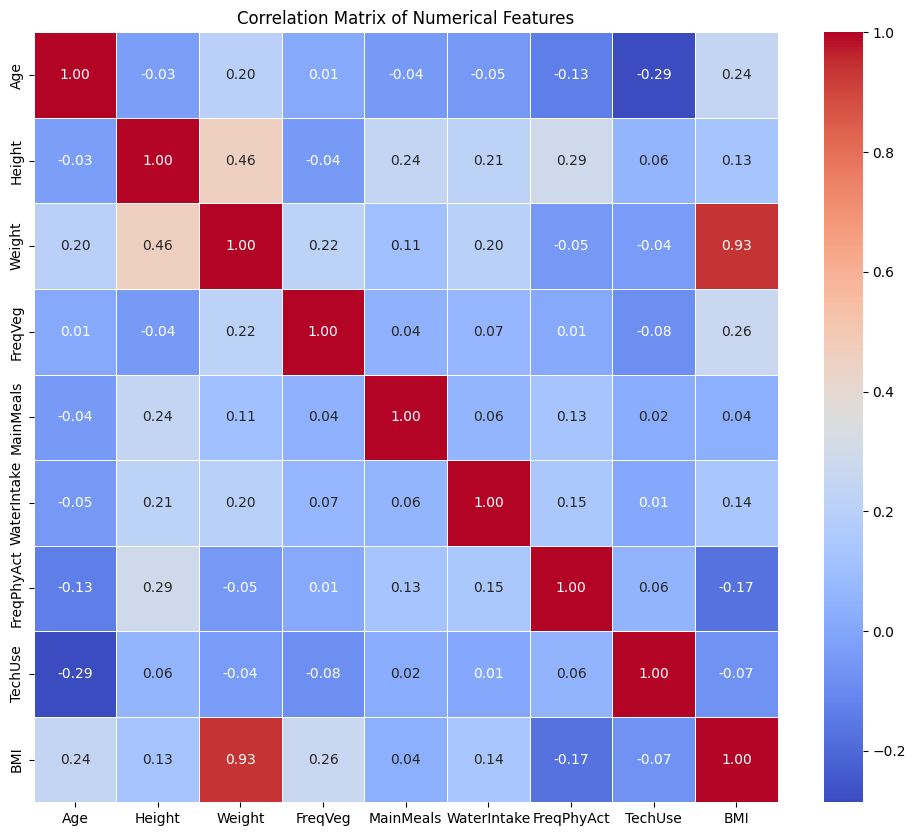

In [11]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Pearson correlation coefficient
correlation_matrix = df[numerical_features].corr()

# Correlation Matrix
print("Correlation matrix for numerical features:")
correlation_matrix

# Heatmap Plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# MODEL TRAINING

- Encoding

In [12]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, categorical_features)
    ]
)

# Prepare feature matrix X and target variable y
X = df.drop(columns=['BMI'])  # Exclude BMI column from features
y = df['BMI']  # Use BMI column as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# REGRESSION

- Defining Regression models

In [13]:
Model_reg = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}


In [14]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = root_mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [15]:
results = []
best_model_name = None
best_model_obj = None
best_r2_score = -float('inf')

In [16]:
categorical_features = ['Gender', 'FamOverweightHist', 'FreqHighCalFood', 'FoodBtwMeals', 'Smoke', 'CalorieMonitor', 'AlcoholConsump', 'Transport']
numerical_features = ['Age', 'Height', 'Weight', 'FreqVeg', 'MainMeals', 'WaterIntake', 'FreqPhyAct', 'TechUse']

In [17]:
for model_name, model in Model_reg.items():
    # Create a pipeline
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    mae, rmse, r2 = evaluate_model(y_test, y_pred)

    result = {
        "Model": model_name,
        "R-squared (R2) Score": r2,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Error (MAE)": mae,
    }
    
    results.append(result)

    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = model_name
        best_model_obj = clf  # Assigning the best model object

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R-squared (R2) Score', ascending=False)

print(f"BEST MODEL IS: {best_model_name}\n")
results_df

ValueError: A given column is not a column of the dataframe

In [ ]:
# New data for prediction
new_data = pd.DataFrame({
    'Age': [35],
    'Height': [1.85],
    'Weight': [100],
    'FreqVeg': [1],
    'MainMeals': [2],
    'WaterIntake': [1],
    'FreqPhyAct': [2],
    'TechUse': [4],
    'Gender': ['Female'],
    'FamOverweightHist': ['yes'],
    'FreqHighCalFood': ['yes'],
    'FoodBtwMeals': ['Sometimes'],
    'Smoke': ['yes'],
    'CalorieMonitor': ['no'],
    'AlcoholConsump': ['Frequently'],
    'Transport': ['Public Transportation'],
})



In [ ]:
all_features = numerical_features + categorical_features

# Reorder new data to match training data columns
new_data = new_data[all_features]
predicted_bmi = model.predict(new_data)

print(f"Predicted BMI: {predicted_bmi[0]}")

In [ ]:
print(f"\nBEST MODEL IS: {best_model_name}\n")

print("SORTED RESULT (Ordered by R-squared (R2) Score):")
results_df_sorted

# DEVIATION

In [ ]:
dif = y_test - y_pred
dif_df = pd.DataFrame({'Actual BMI': y_test, 'Predicted BMI': y_pred, 'Difference': dif})
dif_df.head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dif_df['Difference'], bins=30, kde=True, color='#4B9CD3', linewidth= 2)
plt.title('Distribution of Differences between Actual and Predicted BMI')
plt.xlabel('Difference (Actual - Predicted BMI)')
plt.ylabel('Frequency')
plt.show()

- Scatter plot of actual vs. predicted BMI


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2,  linestyle='--')
plt.title('Actual vs. Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.show()

` | -------------------------------------------- | END |--------------------------------------------- | `